# University Housing Turnout


Cambridge is home to three Universities (Harvard, Lesley, MIT) 

## Harvard College


https://oira.harvard.edu/factbook/fact-book-enrollment/


Total: 7,178
Not US citizens: 947

6231 Potential Voters


The overwhelming majority of Harvard Undergraduates live in one of the Harvard houses, so we 

In [1]:
# %matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta


from processing import *
from plotting import *
from university_housing import *

In [2]:

MUNICIPAL_YEARS = np.arange(2011, 2023, 2)
STATE_YEARS = np.arange(2012, 2023, 2)
NATIONAL_YEARS = np.arange(2012, 2023, 4)
ALL_YEARS = np.arange(2011, 2023, 1)
voters = load_full_dataset("data")

In [3]:
gsas_idx = find_housing_idxs(voters, gsas_dorms)
harvard_ugrad_idx = find_housing_idxs(voters, harvard_ugrad_houses)
hvd_law_idx = find_housing_idxs(voters, hvd_law_dorms)
harvard_housing_idx = find_housing_idxs(voters, harvard_housing)
harvard_1st_idx = find_housing_idxs(voters, harvard_1st_year)
mit_ugrad_idx = find_housing_idxs(voters, mit_dorms)
mit_grad_idx = find_housing_idxs(voters, mit_grad_housing)
lesley_housing_idx = find_housing_idxs(voters, lesley_housing)


### Harvard First Year Houses

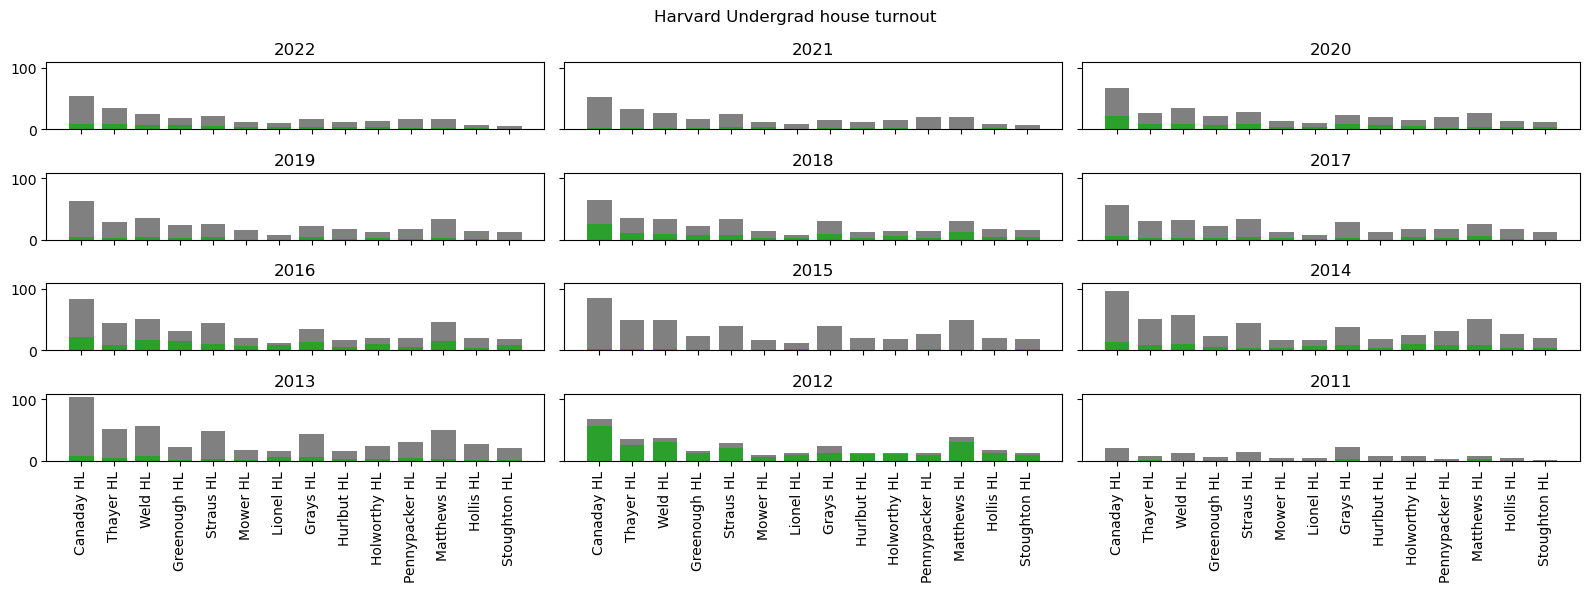

In [4]:
fig, axs = multi_year_bar(voters, university_housing_bar_chart, idx = harvard_1st_idx['all'])
fig.suptitle("Harvard Undergrad house turnout")
plt.tight_layout()

### Harvard Undergraduate Houses

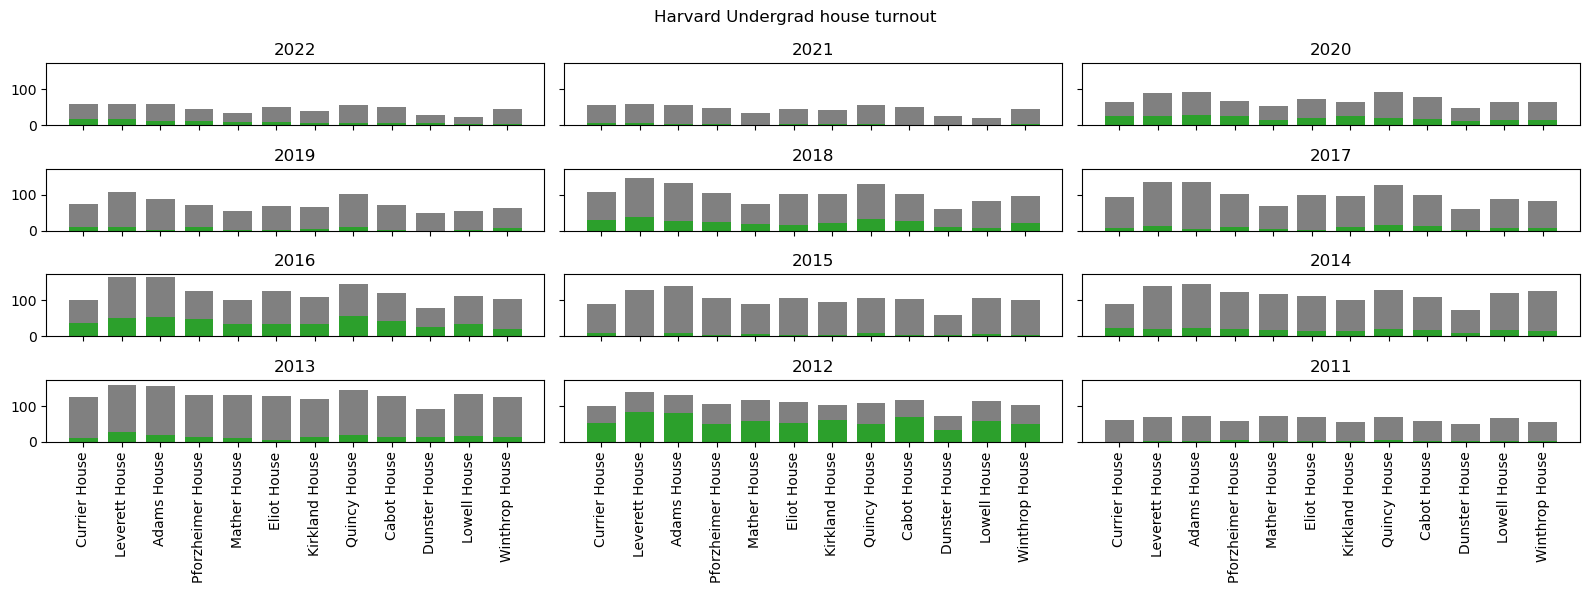

In [13]:
fig, axs = multi_year_bar(voters, university_housing_bar_chart, idx = harvard_ugrad_idx['all'])
fig.suptitle("Harvard Undergrad house turnout")
plt.tight_layout()

### Harvard Grad Dorms

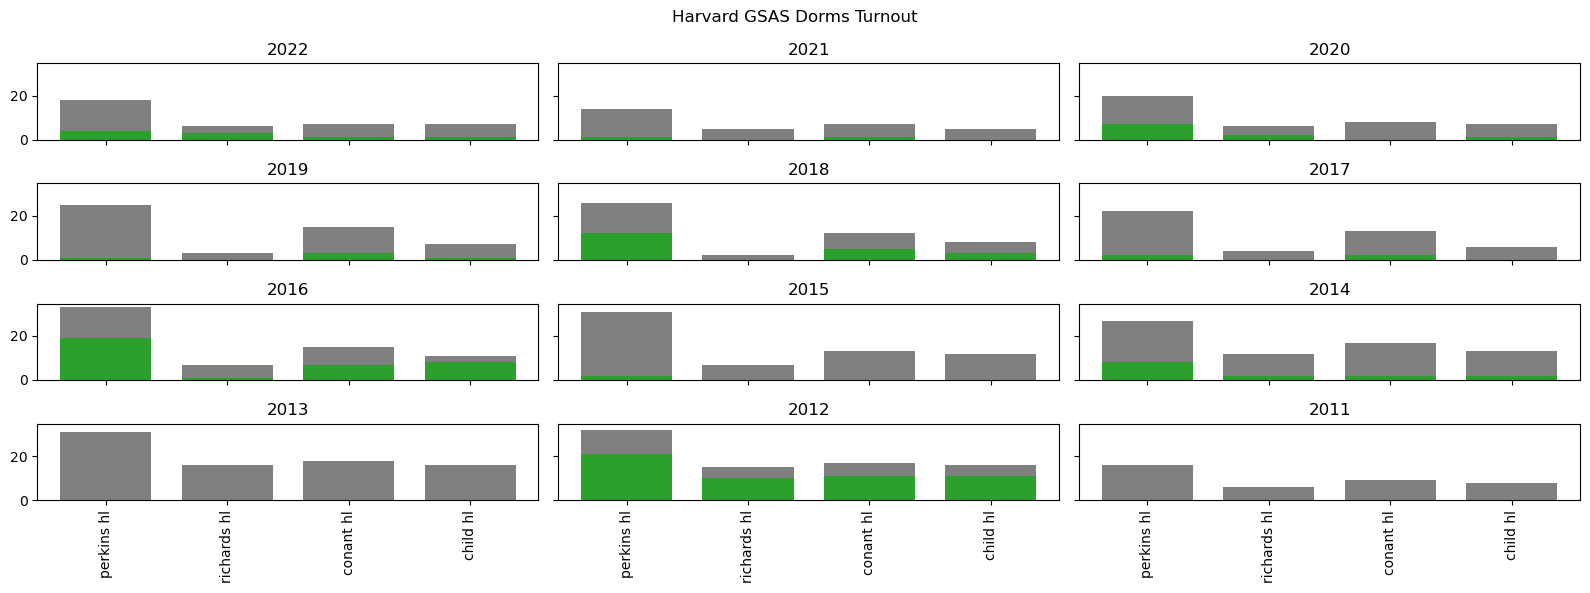

In [6]:
fig, axs = multi_year_bar(voters, university_housing_bar_chart, idx = gsas_idx['all'])
fig.suptitle("Harvard GSAS Dorms Turnout")
plt.tight_layout()

### Harvard University Housing



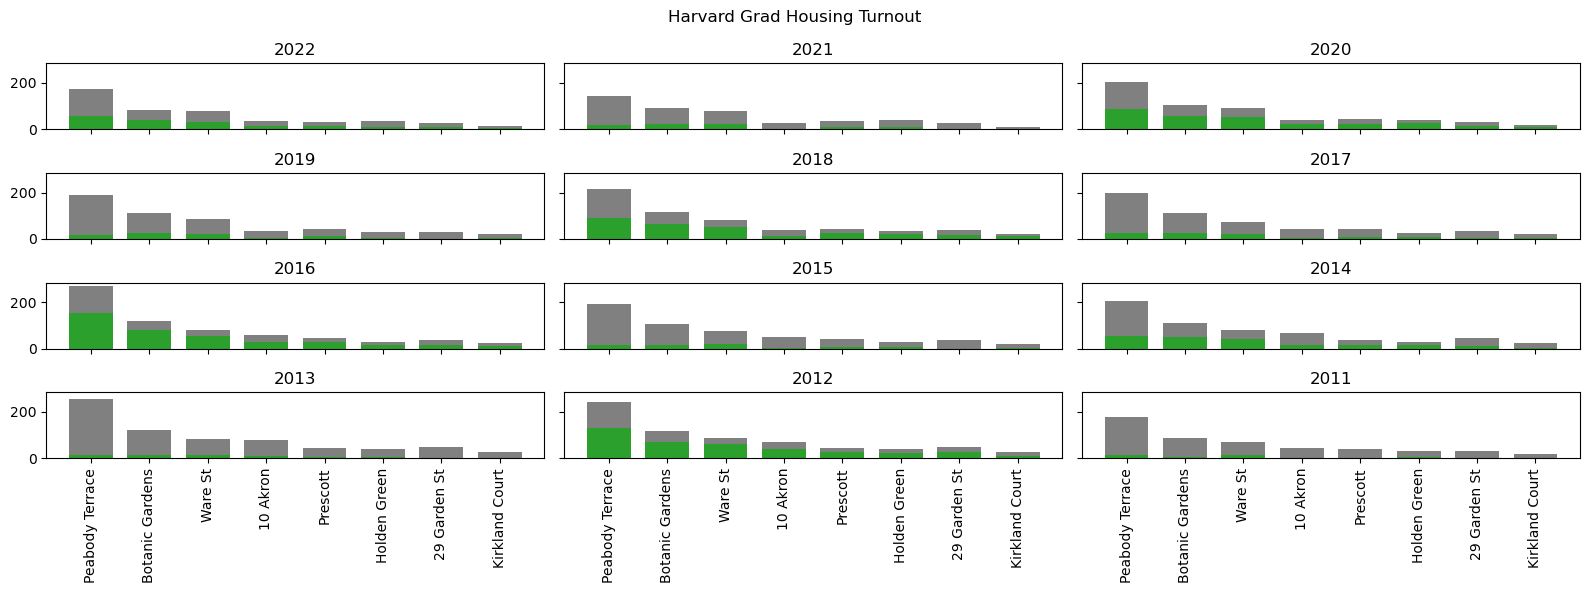

In [7]:
fig, axs = multi_year_bar(voters, university_housing_bar_chart, idx = harvard_housing_idx['all'])
fig.suptitle("Harvard Grad Housing Turnout")
plt.tight_layout()

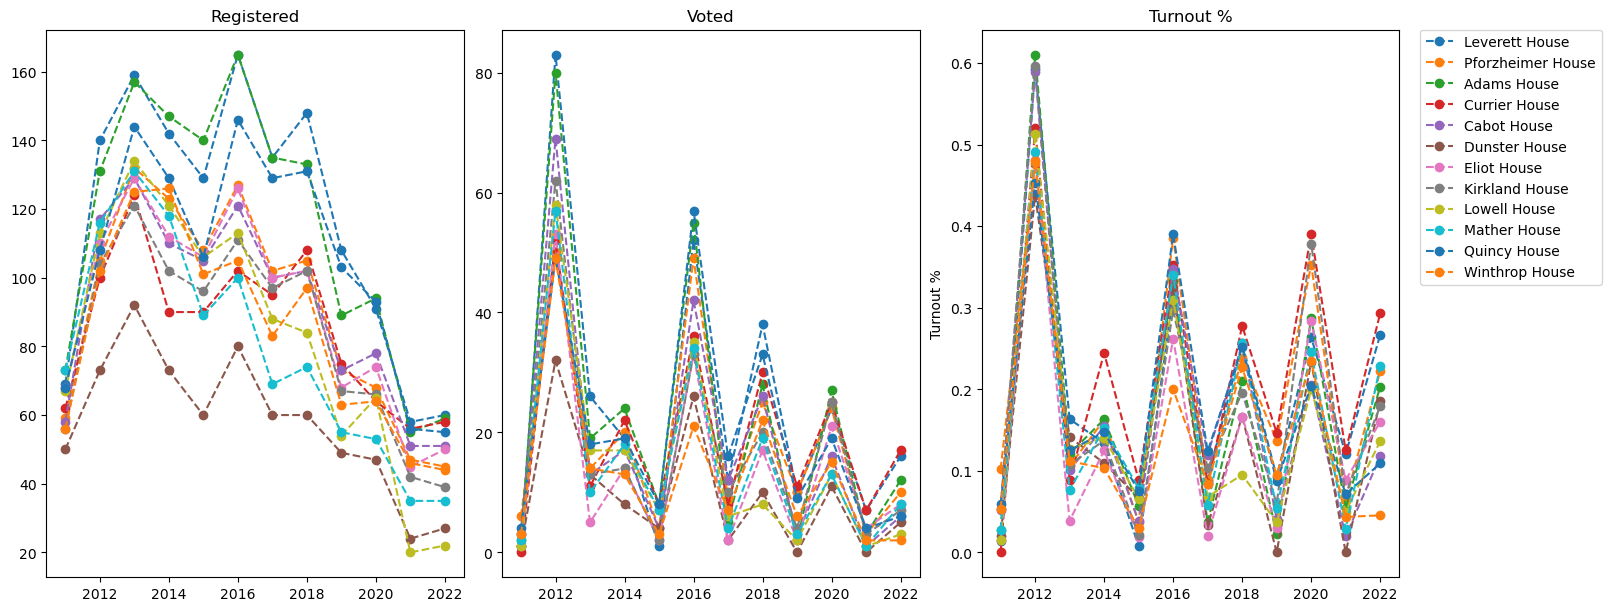

In [8]:

df = turnout_by_year_key(voters, "univ_housing_name")

# groupby is the easiest way i could see to get the order I wanted
# couldn't get the reorder levels to work properly :/
df = df.groupby(["univ_housing_name", "year"]).mean()

fig, axs = plt.subplots(1,3, figsize=(16,6),constrained_layout=True)
for dorm in harvard_ugrad_houses.keys():
    axs[0].plot(df.loc[dorm]['registered'], 'o--', label=dorm.split()[0])
    axs[0].set_title("Registered")
    axs[1].set_title("Voted")
    axs[2].set_title("Turnout %")
    axs[1].plot(df.loc[dorm]['voted'], 'o--', label=dorm.split()[0])
    axs[2].plot(df.loc[dorm]['turnout'], 'o--', label=dorm)
plt.ylabel("Turnout %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [11]:
hvd_college_enrollment = {
    2013:6671,
    2014:6636,
    2015:6634,
    2016:6645,
    2017:6699,
    2018:6722,
    2019:6716,
    2020:5212,
    2021:7095,
    2022:7178,
}